In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [155]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [156]:
del_amt = int((df.sort_values(by='value').count()*0.025))+1
# df.sort_values(by='value')
df = df.sort_values(by='value')[del_amt:-del_amt]

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019.'}, xlabel='Date', ylabel='Page Views'>

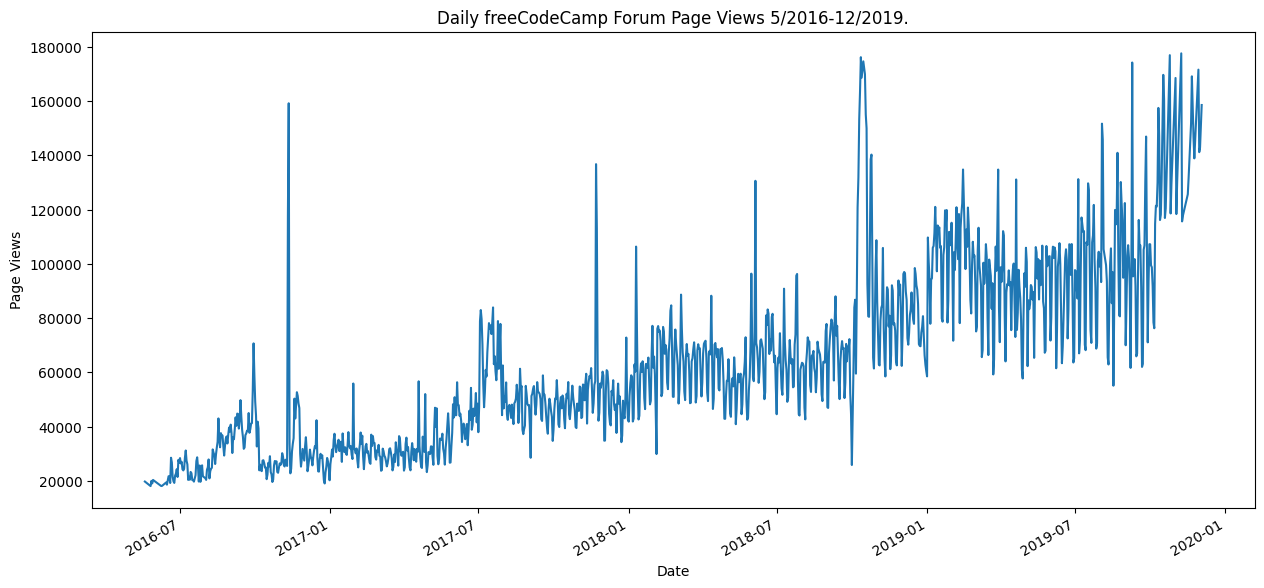

In [157]:

df.plot(legend='',xlabel="Date", ylabel="Page Views",title=r"Daily freeCodeCamp Forum Page Views 5/2016-12/2019.", figsize=(15, 7))


In [164]:
df_bar = df.copy().reset_index()
df_bar['year']=pd.DatetimeIndex(df_bar['date']).year
df_bar['month']=pd.DatetimeIndex(df_bar['date']).month_name()
new = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
df_bar

,date,value,year,month
0,2016-05-26,18060,2016,May
1,2016-06-08,18072,2016,June
2,2016-06-09,18139,2016,June
3,2016-06-07,18335,2016,June
4,2016-06-15,18584,2016,June
...,...,...,...,...
1233,2019-09-09,174212,2019,September
1234,2018-10-15,174639,2018,October
1235,2018-10-12,176175,2018,October
1236,2019-10-25,176921,2019,October


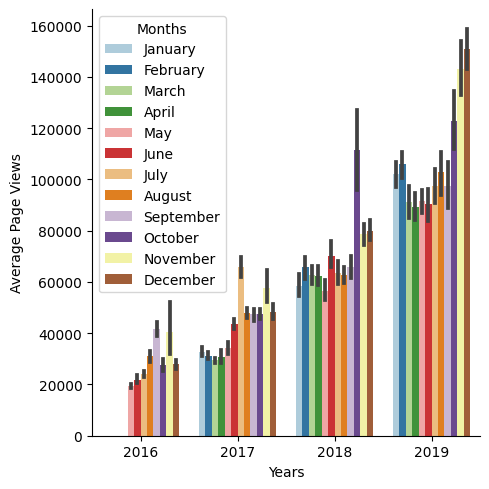

In [212]:
labels = ['January', 'February', 'March', 'April' , 'May' , 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig = sns.catplot(
    legend='',
    x='year', y='value', data = df_bar, hue='month', kind='bar', hue_order=labels,
    palette=sns.color_palette("Paired", 12)).figure
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(loc='upper left', title='Months')

# fig.savefig('test.png')

In [184]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-26,18060,2016,May
1,2016-06-08,18072,2016,Jun
2,2016-06-09,18139,2016,Jun
3,2016-06-07,18335,2016,Jun
4,2016-06-15,18584,2016,Jun
...,...,...,...,...
1233,2019-09-09,174212,2019,Sep
1234,2018-10-15,174639,2018,Oct
1235,2018-10-12,176175,2018,Oct
1236,2019-10-25,176921,2019,Oct


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

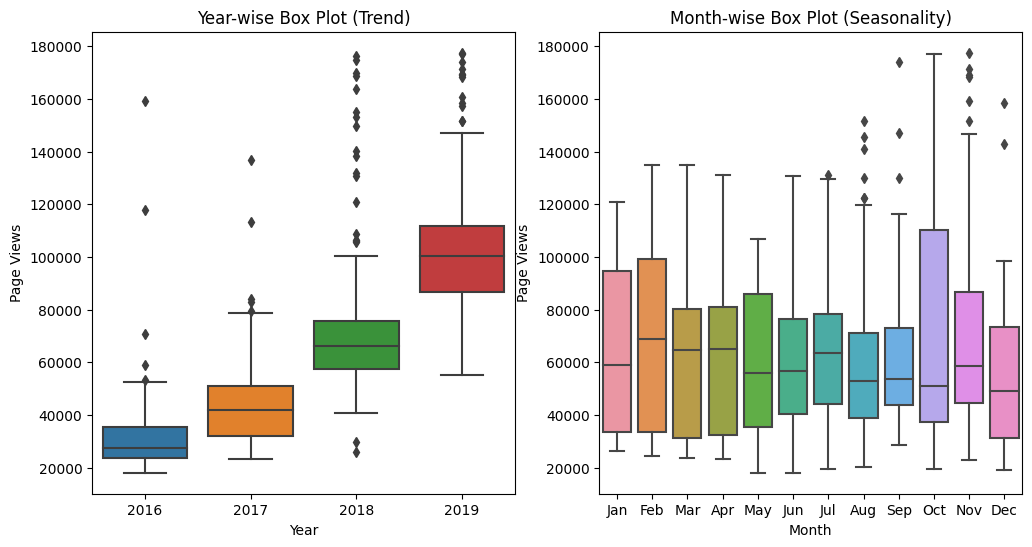

In [201]:
ordering = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
sns.boxplot(data=df_box, x=df_box['year'], y=df_box['value'])
ax1.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")


ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=df_box, x=df_box['month'], y=df_box['value'], order=ordering)
ax2.set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")

